In [1]:
from vega_datasets import data
import pandas as pd
import matplotlib.pyplot as plt
from functions_time import clean_store

In [2]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
df.date = pd.to_datetime(df.date)
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [4]:
df.date.dt.day_name()

0       Friday
1       Friday
2       Friday
3       Friday
4       Friday
         ...  
8754    Friday
8755    Friday
8756    Friday
8757    Friday
8758    Friday
Name: date, Length: 8759, dtype: object

In [5]:
df = df.set_index('date').sort_index() #make date the index
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [6]:
df['weekday'] = df.index.day_name()

In [7]:
df['weekday_number'] = df.index.day_of_week #make a column to number weekday

In [8]:
df.head()

,temp,weekday,weekday_number
date,,,
2010-01-01 00:00:00,47.8,Friday,4
2010-01-01 01:00:00,47.4,Friday,4
2010-01-01 02:00:00,46.9,Friday,4
2010-01-01 03:00:00,46.5,Friday,4
2010-01-01 04:00:00,46.0,Friday,4


In [9]:
df.groupby('weekday').mean().sort_values('weekday_number')

,temp,weekday_number
weekday,,
Monday,56.952724,0.0
Tuesday,56.945753,1.0
Wednesday,56.937821,2.0
Thursday,56.937981,3.0
Friday,56.795912,4.0
Saturday,56.945913,5.0
Sunday,56.955172,6.0


<AxesSubplot:xlabel='weekday'>

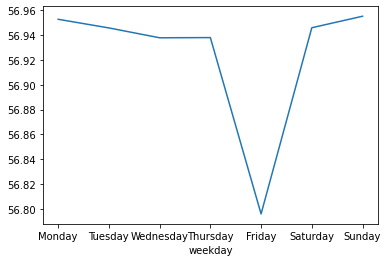

In [10]:
df.groupby('weekday').mean().sort_values('weekday_number').temp.plot() # group by weekday mean and plot 

### Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='weekday'>

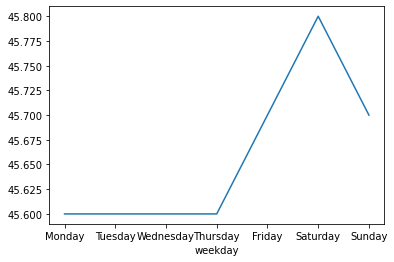

In [11]:
df.groupby('weekday').min().sort_values('weekday_number').temp.plot()

### Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='weekday'>

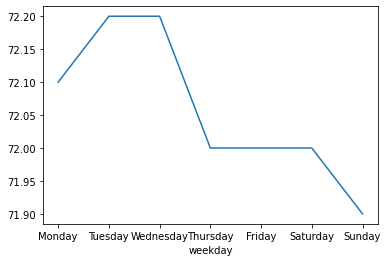

In [12]:
df.groupby('weekday').max().sort_values('weekday_number').temp.plot()

### Which month is the coldest, on average? January

In [13]:
df['month'] = df.index.month_name() #make month column
df.head()

,temp,weekday,weekday_number,month
date,,,,
2010-01-01 00:00:00,47.8,Friday,4,January
2010-01-01 01:00:00,47.4,Friday,4,January
2010-01-01 02:00:00,46.9,Friday,4,January
2010-01-01 03:00:00,46.5,Friday,4,January
2010-01-01 04:00:00,46.0,Friday,4,January


<AxesSubplot:xlabel='month'>

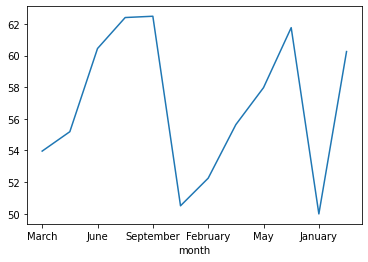

In [14]:
df.groupby('month').mean().sort_values('weekday_number').temp.plot()

### Which month has the highest average temperature? August/september

### Resample by the day and calculate the min and max temp for the day 

In [15]:
df.groupby('weekday')['temp'].agg(['min','max'])

,min,max
weekday,,
Friday,45.7,72.0
Monday,45.6,72.1
Saturday,45.8,72.0
Sunday,45.7,71.9
Thursday,45.6,72.0
Tuesday,45.6,72.2
Wednesday,45.6,72.2


In [16]:
df.head()

,temp,weekday,weekday_number,month
date,,,,
2010-01-01 00:00:00,47.8,Friday,4,January
2010-01-01 01:00:00,47.4,Friday,4,January
2010-01-01 02:00:00,46.9,Friday,4,January
2010-01-01 03:00:00,46.5,Friday,4,January
2010-01-01 04:00:00,46.0,Friday,4,January


### Seattle weather

In [17]:
data.seattle_weather()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [18]:
s_df = data.seattle_weather()
s_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [19]:
s_df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [20]:
s_df = s_df.set_index('date').sort_index()

Which year and month combination has the highest amount of precipitation

In [21]:
s_df['month'] = s_df.index.month_name() #make month column
s_df['year'] = s_df.index.year
s_df.head()

,precipitation,temp_max,temp_min,wind,weather,month,year
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,January,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,January,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,January,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,January,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,January,2012


<AxesSubplot:xlabel='year,month'>

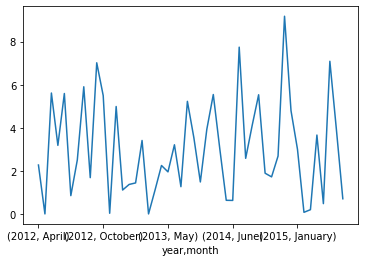

In [22]:
s_df.groupby(['year', 'month']).mean().precipitation.plot()

<AxesSubplot:xlabel='year'>

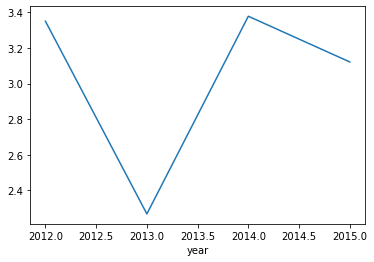

In [23]:
s_df.groupby('year').mean().precipitation.plot()

In [ ]:
for col in list(df_power.columns.drop('Date')):
    plt.figure()
    sns.histplot(df_power[col])
    plt.title('Distribution of {}'.format(col))